In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import zipfile as zf
files = zf.ZipFile("formula1.zip", 'r')
files.extractall('directory to extract')
files.close()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import numpy as np # linear algebra
# data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import os
fnames = []
fpaths = []
for dirname, _, filenames in os.walk('/formula1data'):
    for filename in filenames:
        fnames.append(filename.split('.')[0])
        fpaths.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

In [28]:

circuits = pd.read_csv('formula1data/circuits.csv', index_col=0, na_values=r'\N')
constructorResults = pd.read_csv('formula1data/constructor_results.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv('formula1data/constructors.csv', index_col=0, na_values=r'\N')
constructorStandings = pd.read_csv('formula1data/constructor_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv('formula1data/drivers.csv', index_col=0, na_values=r'\N')
driverStandings = pd.read_csv('formula1data/driver_standings.csv', index_col=0, na_values=r'\N')
lapTimes = pd.read_csv('formula1data/lap_times.csv')
pitStops = pd.read_csv('formula1data/pit_stops.csv')
qualifying = pd.read_csv('formula1data/qualifying.csv', index_col=0, na_values=r'\N')
races = pd.read_csv('formula1data/races.csv', na_values=r'\N')
results = pd.read_csv('formula1data/results.csv', index_col=0, na_values=r'\N')
seasons = pd.read_csv('formula1data/seasons.csv', index_col=0, na_values=r'\N')
status = pd.read_csv('formula1data/status.csv', index_col=0, na_values=r'\N')

In [42]:

races = races.astype('int')
x = pd.merge(results,races,left_on='raceId',right_index=True,how='outer')
# merging all seperate dataframe into single dataframe as df

y = pd.merge(x, drivers, left_on = 'driverId',right_index=True,how='outer')
a = pd.merge(y, constructors, left_on ='constructorId',right_index=True,how='outer')
newResults = pd.merge(a, status, left_on ='statusId',right_index=True,how='outer')
pd.get_option("display.max_columns",None)
newResults.head()

,raceId,raceId_x,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,status
1.0,18.0,18.0,1.0,1.0,22.0,1.0,1.0,1,1.0,10.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
27.0,19.0,19.0,1.0,1.0,22.0,9.0,5.0,5,5.0,4.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
69.0,21.0,21.0,1.0,1.0,22.0,5.0,3.0,3,3.0,6.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
90.0,22.0,22.0,1.0,1.0,22.0,3.0,2.0,2,2.0,8.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
109.0,23.0,23.0,1.0,1.0,22.0,3.0,1.0,1,1.0,10.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [43]:
newResults.describe().T

,count,mean,std,min,25%,50%,75%,max
raceId,25863.0,5.317965e+02,2.996364e+02,0.00,293.000,515.000,7.850000e+02,1101.00
raceId_x,25840.0,5.314258e+02,2.994409e+02,1.00,293.000,514.000,7.840000e+02,1096.00
driverId,25842.0,2.617782e+02,2.686637e+02,1.00,56.000,163.000,3.600000e+02,858.00
constructorId,25841.0,4.862985e+01,5.973148e+01,1.00,6.000,25.000,5.800000e+01,214.00
number_x,25834.0,1.779008e+01,1.510484e+01,0.00,7.000,15.000,2.400000e+01,208.00
grid,25840.0,1.117906e+01,7.243725e+00,0.00,5.000,11.000,1.700000e+01,34.00
position,14989.0,7.942491e+00,4.806021e+00,1.00,4.000,7.000,1.100000e+01,33.00
positionOrder,25840.0,1.287601e+01,7.712391e+00,1.00,6.000,12.000,1.800000e+01,39.00
points,25840.0,1.877053e+00,4.169849e+00,0.00,0.000,0.000,2.000000e+00,50.00
laps,25840.0,4.597752e+01,2.980895e+01,0.00,22.000,52.000,6.600000e+01,200.00


In [51]:
columns = ["driverId", "fastestLap", "rank", "raceId_x", "positionOrder","points", "laps", "fastestLapSpeed", "statusId",  "position", "constructorId", ]
newResults = newResults.reindex(columns=columns)
newResults.describe().T

,count,mean,std,min,25%,50%,75%,max
driverId,25868.0,261.778191,268.528691,1.00,56.000000,163.000000,360.000000,858.00
fastestLap,25868.0,42.514162,8.991384,2.00,42.514162,42.514162,42.514162,85.00
rank,25868.0,10.409959,3.338091,0.00,10.409959,10.409959,10.409959,24.00
raceId_x,25868.0,531.425813,299.278797,1.00,293.000000,515.000000,783.000000,1096.00
positionOrder,25868.0,12.876006,7.708215,1.00,6.000000,12.000000,18.000000,39.00
points,25868.0,1.877053,4.167591,0.00,0.000000,0.000000,2.000000,50.00
laps,25868.0,45.977515,29.792813,0.00,22.000000,52.000000,66.000000,200.00
fastestLapSpeed,25868.0,203.089214,11.406017,89.54,203.089214,203.089214,203.089214,257.32
statusId,25868.0,17.577664,26.161183,1.00,1.000000,11.000000,14.000000,141.00
position,25868.0,7.942491,3.658344,1.00,6.000000,7.942491,8.000000,33.00


In [52]:
newResults = newResults.loc[:,columns]
#newResults.fillna(newResults.mean())

newResults.fillna(newResults.mean())

#------------------------------------------------
#----(Code 2) Selective Treatment----------------

for i in newResults.columns[newResults.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    newResults[i].fillna(newResults[i].mean(),inplace=True)

newResults.isna().sum()
newResults.describe().T

,count,mean,std,min,25%,50%,75%,max
driverId,25868.0,261.778191,268.528691,1.00,56.000000,163.000000,360.000000,858.00
fastestLap,25868.0,42.514162,8.991384,2.00,42.514162,42.514162,42.514162,85.00
rank,25868.0,10.409959,3.338091,0.00,10.409959,10.409959,10.409959,24.00
raceId_x,25868.0,531.425813,299.278797,1.00,293.000000,515.000000,783.000000,1096.00
positionOrder,25868.0,12.876006,7.708215,1.00,6.000000,12.000000,18.000000,39.00
points,25868.0,1.877053,4.167591,0.00,0.000000,0.000000,2.000000,50.00
laps,25868.0,45.977515,29.792813,0.00,22.000000,52.000000,66.000000,200.00
fastestLapSpeed,25868.0,203.089214,11.406017,89.54,203.089214,203.089214,203.089214,257.32
statusId,25868.0,17.577664,26.161183,1.00,1.000000,11.000000,14.000000,141.00
position,25868.0,7.942491,3.658344,1.00,6.000000,7.942491,8.000000,33.00


In [53]:
#from sklearn.impute import SimpleImputer
#from sklearn.ensemble import RandomForestClassifier

#imp = SimpleImputer(strategy="most_frequent")
#print(imp.fit_transform(newResults))
#newResults.isna().sum()
#newResults.describe().T

#newResults = newResults.drop("raceId_y")
#newResults = newResults.drop("curcuitId")

In [54]:
from matplotlib import rcParams
import warnings
from sklearn import preprocessing
from sklearn import utils

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

#newResults = SimpleImputer(missing_values=np.nan, strategy='mean')
#newResults = newResults.fit(X_train)
X = newResults.drop("position", axis=1)
y = newResults["position"]

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

warnings.filterwarnings("ignore")


# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.1, random_state=42)

#X_train_imp = newResults.transform(X_train)
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score
# predictin on the test set
y_pred = clf.predict(X_test)
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.966756861229223


In [56]:
# check Important features

feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
4,positionOrder,0.475563
5,points,0.145487
6,laps,0.124105
8,statusId,0.103722
3,raceId_x,0.041161
0,driverId,0.029697
1,fastestLap,0.024573
9,constructorId,0.022127
2,rank,0.019824
7,fastestLapSpeed,0.013743


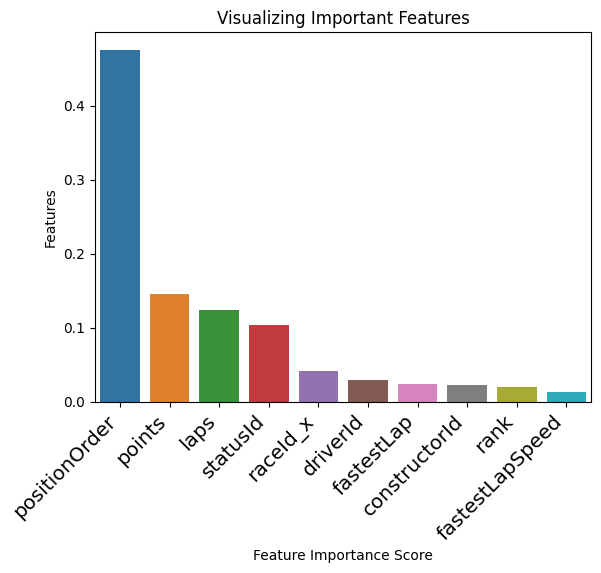

In [58]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()